# LAB2 Data Exploration and Visualization (Getting to know our data)

## Setup

In [22]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [23]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [24]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request


In [25]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

Downloaded the data and saved under the directory and store it in the same location of the notebook and sub folders "Desktop/F21DL_PROJECT/"

Using pandas library feature "read_csv" to loads the `marketing_data_clean.csv` into a panda `dataframe`

In [26]:
market = pd.read_csv("Market_data_clean.csv")

In [27]:
 # "market" is a pandas DataFrame object containing all the data
market.head() # Display the top five rows of the DataFrame
#Q1 How many attribuites in the data set? Desribe the attribuites .

,Unnamed: 0,Region,Industry,Number_of_firms,ROE,EPS_Growth,PE,PBV,PS,Beta,Cost_of_Equity,CEO_holding,Institutional_holding
0,1,US,Advertising,48,22.55,0.20,35.59,5.54,1.01,1.22,9.93,6.02,33.30
1,2,US,Aerospace/Defense,85,32.01,19.82,43.13,5.75,1.54,1.24,10.07,3.07,56.84
2,3,US,Air Transport,18,27.62,23.57,7.05,2.46,0.69,1.02,8.77,2.41,73.51
3,4,US,Apparel,50,11.32,4.56,35.79,3.09,1.27,0.93,8.23,8.79,54.55
4,5,US,Auto & Truck,14,7.32,1.42,7.12,1.63,0.42,0.79,7.41,9.08,67.85


In [28]:
#Q1 How many attribuites in the data set? Desribe the attribuites .
attribute_count = market.shape[1]
attribute_count

13

In [29]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
market.info() 
#Q2 Can you tell if there are any missing values? If yes, which attribuites contain missing values ?
#The rangeindex value = 282 so any attribute with non-Null values less than 282 contains some missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             282 non-null    int64  
 1   Region                 282 non-null    object 
 2   Industry               282 non-null    object 
 3   Number_of_firms        282 non-null    int64  
 4   ROE                    282 non-null    float64
 5   EPS_Growth             282 non-null    float64
 6   PE                     282 non-null    float64
 7   PBV                    281 non-null    float64
 8   PS                     282 non-null    float64
 9   Beta                   282 non-null    float64
 10  Cost_of_Equity         282 non-null    float64
 11  CEO_holding            282 non-null    float64
 12  Institutional_holding  282 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 28.8+ KB


#### CATEGORICAL VARIABLES
value_count() methord displays all the distinct categories and how many times they appear under the specified categorical varible  

In [30]:
market["Region"].value_counts() #Region categories and how many times each is recorded

US     94
EUR    94
EMG    94
Name: Region, dtype: int64

In [31]:
market["Industry"].value_counts() #idustry categories and how many times each is recorded

Advertising                        3
Power                              3
Restaurant/Dining                  3
Reinsurance                        3
Recreation                         3
                                  ..
Engineering/Construction           3
Electronics (General)              3
Electronics (Consumer & Office)    3
Electrical Equipment               3
Utility (Water)                    3
Name: Industry, Length: 94, dtype: int64

#### NUMERICAL VARIABLES

In [32]:
#This method shows a statistical summary of the numerical attributes 
market.describe()

,Unnamed: 0,Number_of_firms,ROE,EPS_Growth,PE,PBV,PS,Beta,Cost_of_Equity,CEO_holding,Institutional_holding
count,282.000000,282.000000,282.000000,282.000000,282.000000,281.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,141.500000,126.180851,13.207447,7.664574,59.667128,2.503167,1.805496,1.098546,10.596064,7.880638,32.865177
std,81.550598,159.767734,14.699839,13.069173,109.812650,2.527295,1.581147,0.299865,2.415450,5.367768,19.384676
min,1.000000,2.000000,-134.380000,-133.850000,7.050000,0.380000,0.090000,0.270000,4.270000,0.000000,7.450000
25%,71.250000,30.000000,8.232500,3.042500,21.622500,1.270000,0.772500,0.892500,9.157500,3.462500,14.792500
50%,141.500000,70.500000,11.540000,6.380000,34.700000,1.790000,1.225000,1.100000,10.185000,7.120000,29.900000
75%,211.750000,139.500000,16.730000,10.725000,60.685000,3.070000,2.350000,1.267500,12.002500,11.945000,44.522500
max,282.000000,898.000000,95.940000,70.670000,1304.340000,28.740000,9.610000,2.470000,18.470000,21.390000,90.520000


The count, mean, min, and max rows are self-explanatory. The null values are ignored 
The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.

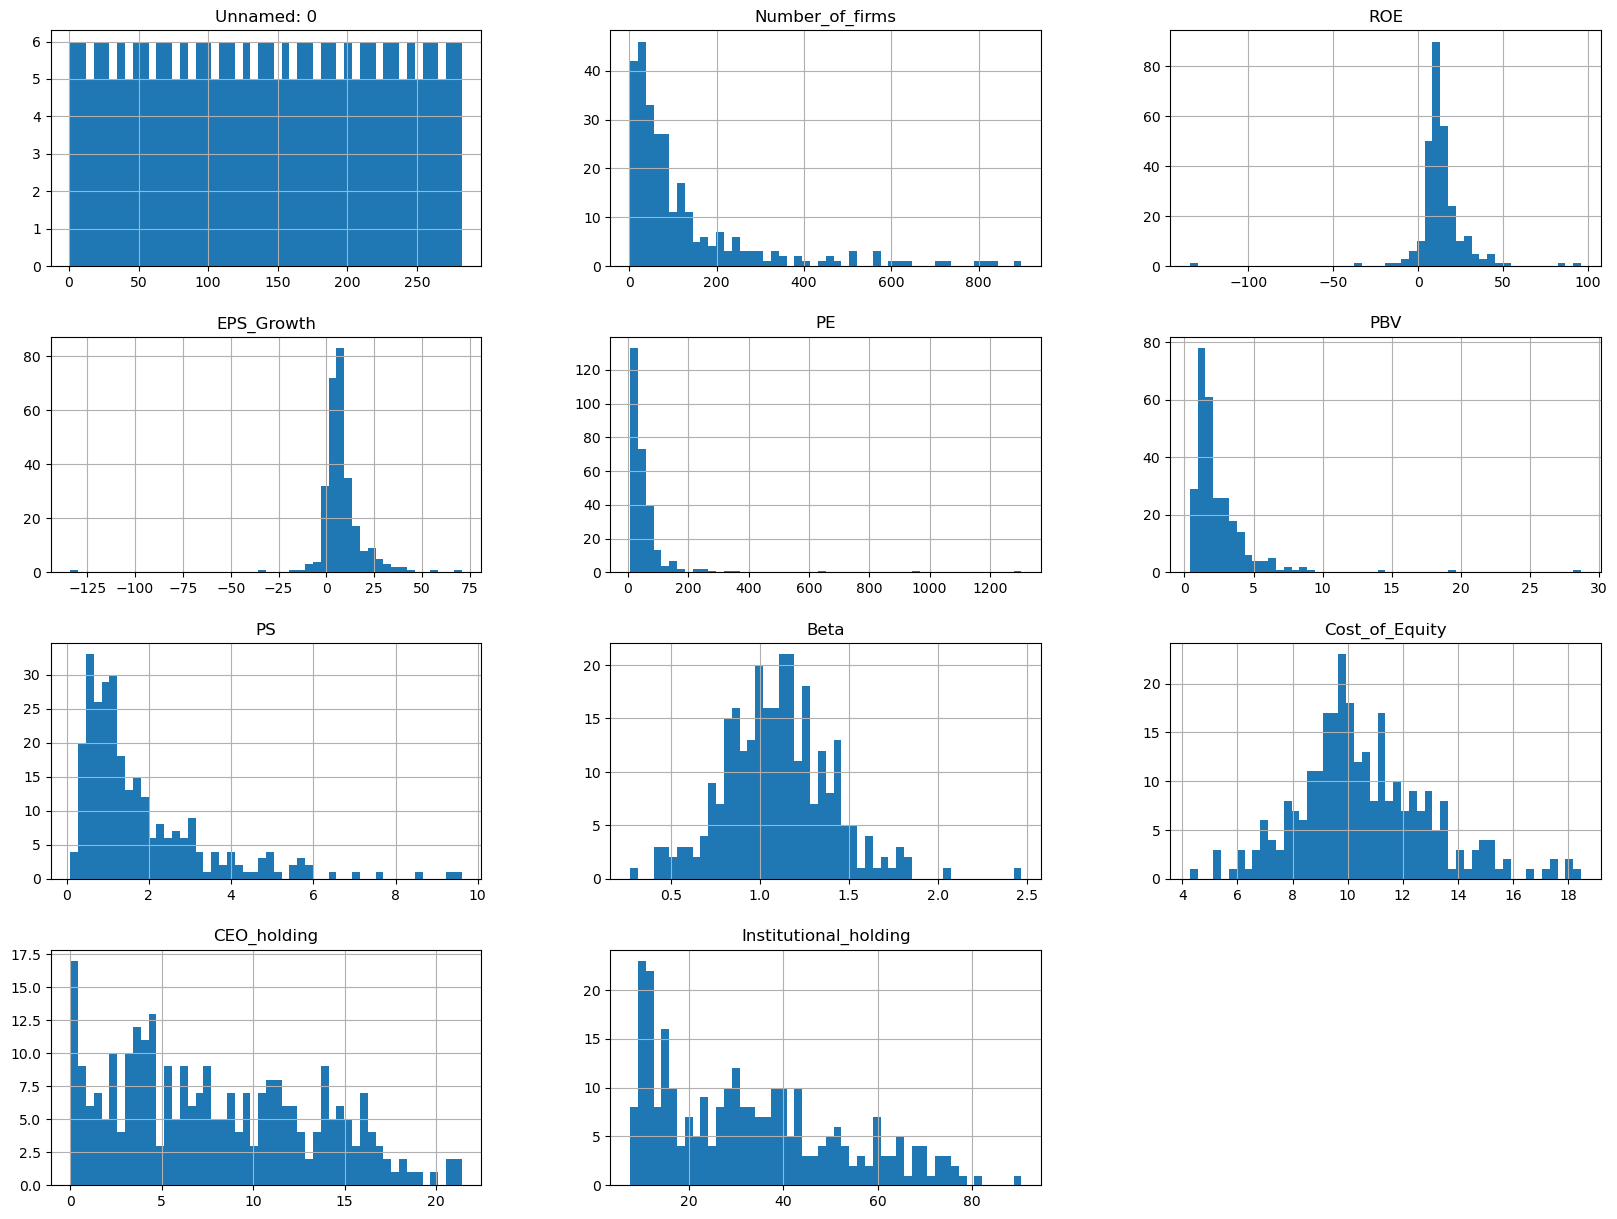

In [33]:
#To plot a histogram for each numerical attribute
market.hist(bins=50, figsize=(20,15))
plt.show()
# Q4 List down the main observations you noted from the statistical summary and the histogram

In [34]:
# Now we will look at the correlation of all the attributes with the expected class attribute (PE)
corr_matrix = market.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

/var/folders/8s/4lnk3z5s7qlg6j343w85c2mc0000gn/T/ipykernel_2225/4271807055.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = market.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes


In [35]:
corr_matrix["PE"].sort_values(ascending=False)



PE                       1.000000
PBV                      0.198911
PS                       0.137441
CEO_holding              0.072305
Beta                     0.027181
Number_of_firms          0.026248
Institutional_holding    0.014252
Cost_of_Equity           0.005841
Unnamed: 0              -0.045717
ROE                     -0.296137
EPS_Growth              -0.323101
Name: PE, dtype: float64

array([[<AxesSubplot:xlabel='PE', ylabel='PE'>,
        <AxesSubplot:xlabel='PBV', ylabel='PE'>,
        <AxesSubplot:xlabel='ROE', ylabel='PE'>],
       [<AxesSubplot:xlabel='PE', ylabel='PBV'>,
        <AxesSubplot:xlabel='PBV', ylabel='PBV'>,
        <AxesSubplot:xlabel='ROE', ylabel='PBV'>],
       [<AxesSubplot:xlabel='PE', ylabel='ROE'>,
        <AxesSubplot:xlabel='PBV', ylabel='ROE'>,
        <AxesSubplot:xlabel='ROE', ylabel='ROE'>]], dtype=object)

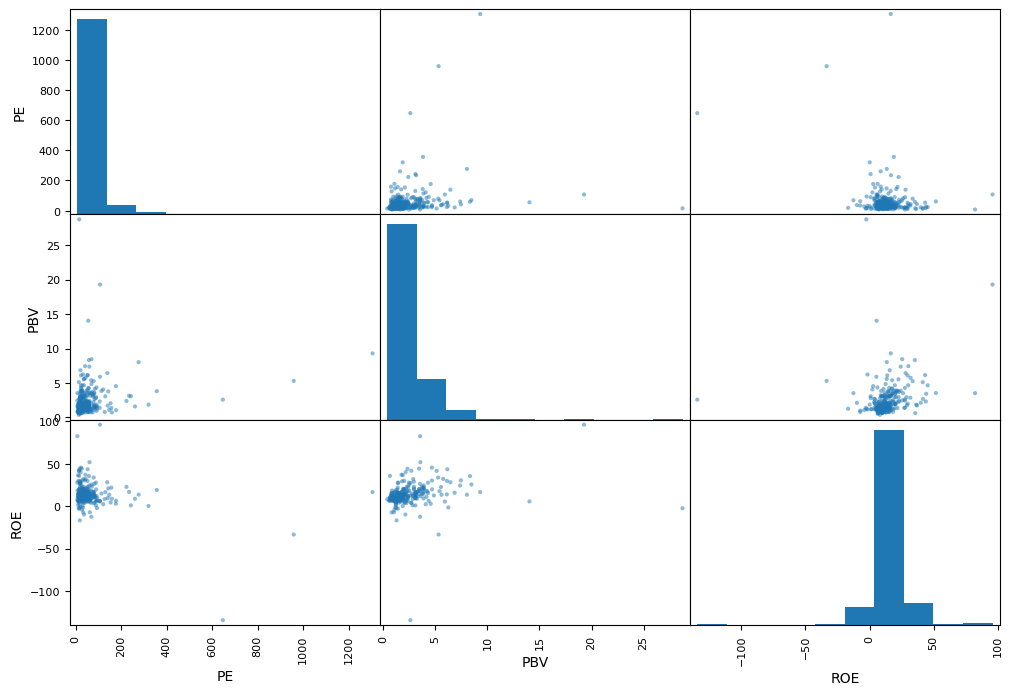

In [36]:
from pandas.plotting import scatter_matrix

attributes = ["PE", "PBV", "ROE"]
scatter_matrix(market[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other


<AxesSubplot:xlabel='PE', ylabel='PBV'>

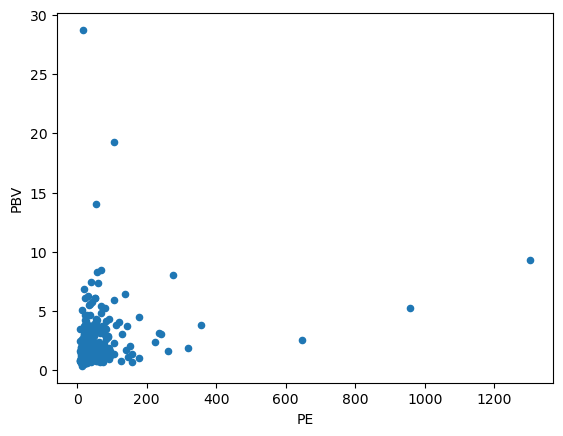

In [37]:
# let’s zoom in on the correlation scatterplot "age & latitude,"
market.plot(kind="scatter", x="PE", y="PBV",
             alpha=1)

#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line?

# Prepare the Data for Machine Learning Algorithms

## Data Cleaning
Dealing with missing features


1. Get rid of the corresponding districts. `dropna()`
2. Get rid of the whole attribute. `drop()` 
3. Set the values to some value (zero, the mean, the median, etc.)  `fillna()`


In [38]:
sample_incomplete_rows = market[market.isnull().any(axis=1)].head()
sample_incomplete_rows   # display rows with missing values


,Unnamed: 0,Region,Industry,Number_of_firms,ROE,EPS_Growth,PE,PBV,PS,Beta,Cost_of_Equity,CEO_holding,Institutional_holding
68,69,US,Restaurant/Dining,78,0.13,0.07,29.24,NaN,2.66,0.8,7.44,5.3,63.59


#### Delete all the missing data

In [39]:
market_1 = market.dropna()

In [40]:

sample_incomplete_rows1 = market_1[market_1.isnull().any(axis=1)].head()
sample_incomplete_rows1   # display rows with missing values


,Unnamed: 0,Region,Industry,Number_of_firms,ROE,EPS_Growth,PE,PBV,PS,Beta,Cost_of_Equity,CEO_holding,Institutional_holding


### Handling Text and Categorical Attributes

### ONE-HOT-ENCODING

##### 1. REGION

In [41]:
market_reg = market[["Region"]]

In [42]:
# An alternative way to represent a categorical attribuite is to use 'one-hot-encoding'

from sklearn.preprocessing import OneHotEncoder  
# OneHotEncoder class converts categorical values into one-hot vectors , this assumes no order so better for categorical variables

reg_encoder = OneHotEncoder()
market_armed_1hot = reg_encoder.fit_transform(market_reg)
market_armed_1hot

<282x3 sparse matrix of type '<class 'numpy.float64'>'
	with 282 stored elements in Compressed Sparse Row format>

In [43]:
type(market_armed_1hot) # This is a SciPy sparce matrix ( not a NumPy array)
# a sparse matrix only stores the location of the non‐zero enties , therefore saves memory

scipy.sparse.csr.csr_matrix

In [44]:
market_armed_1hot.toarray() # To convert it to a (dense) NumPy array, call toarrray() method

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [45]:
reg_encoder = OneHotEncoder(sparse=False) # Alternatively, you can set sparse=False when creating the OneHotEncoder
market_armed_1hot = reg_encoder.fit_transform(market_reg)
market_armed_1hot

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [46]:
reg_encoder.categories_         # Get a list of categories

[array(['EMG', 'EUR', 'US'], dtype=object)]

##### 2. iNDUSTRY

In [47]:
market_ind = market[["Industry"]]

In [48]:
ind_encoder = OneHotEncoder(sparse=False)
market_ind_1hot = ind_encoder.fit_transform(market_ind)
market_ind_1hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [49]:
ind_encoder.categories_

[array(['Advertising', 'Aerospace/Defense', 'Air Transport', 'Apparel',
        'Auto & Truck', 'Auto Parts', 'Bank (Money Center)',
        'Banks (Regional)', 'Beverage (Alcoholic)', 'Beverage (Soft)',
        'Broadcasting', 'Brokerage & Investment Banking',
        'Building Materials', 'Business & Consumer Services', 'Cable TV',
        'Chemical (Basic)', 'Chemical (Diversified)',
        'Chemical (Specialty)', 'Coal & Related Energy',
        'Computer Services', 'Computers/Peripherals',
        'Construction Supplies', 'Diversified', 'Drugs (Biotechnology)',
        'Drugs (Pharmaceutical)', 'Education', 'Electrical Equipment',
        'Electronics (Consumer & Office)', 'Electronics (General)',
        'Engineering/Construction', 'Entertainment',
        'Environmental & Waste Services', 'Farming/Agriculture',
        'Financial Svcs. (Non-bank & Insurance)', 'Food Processing',
        'Food Wholesalers', 'Furn/Home Furnishings',
        'Green & Renewable Energy', 'Healthcare

### NORMALISATION

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
from sklearn.compose import make_column_transformer

# LAB 3 FEATURE SELECTION



#### DEVIDING DATA INTO CLASSES

 We decided to split our PE variable  into diferent 2 different classes
 
 PE greator than the median = high
 
 PE lower or equal to the median = low

In [52]:
med = market["PE"].median()

In [53]:

market1 = market_1[:]
market1.loc[market1["PE"] <= med, 'PE_cat'] = 1
market1.loc[market1['PE'] >= med, 'PE_cat'] = 0
##Drop the PE columns
market1 = market1.drop(['PE'], axis='columns')
market1.head()

/var/folders/8s/4lnk3z5s7qlg6j343w85c2mc0000gn/T/ipykernel_2225/3902751112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market1.loc[market1["PE"] <= med, 'PE_cat'] = 1


,Unnamed: 0,Region,Industry,Number_of_firms,ROE,EPS_Growth,PBV,PS,Beta,Cost_of_Equity,CEO_holding,Institutional_holding,PE_cat
0,1,US,Advertising,48,22.55,0.20,5.54,1.01,1.22,9.93,6.02,33.30,0.0
1,2,US,Aerospace/Defense,85,32.01,19.82,5.75,1.54,1.24,10.07,3.07,56.84,0.0
2,3,US,Air Transport,18,27.62,23.57,2.46,0.69,1.02,8.77,2.41,73.51,1.0
3,4,US,Apparel,50,11.32,4.56,3.09,1.27,0.93,8.23,8.79,54.55,0.0
4,5,US,Auto & Truck,14,7.32,1.42,1.63,0.42,0.79,7.41,9.08,67.85,1.0


In [54]:
#Obtaining correlation against PE
market.corr()[['PE']].sort_values(by='PE', ascending=False,key=abs) 
## This output correlation values in decreasing absolute value (ignoring the sign) order

/var/folders/8s/4lnk3z5s7qlg6j343w85c2mc0000gn/T/ipykernel_2225/4233709138.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  market.corr()[['PE']].sort_values(by='PE', ascending=False,key=abs)


,PE
PE,1.000000
EPS_Growth,-0.323101
ROE,-0.296137
PBV,0.198911
PS,0.137441
CEO_holding,0.072305
Unnamed: 0,-0.045717
Beta,0.027181
Number_of_firms,0.026248
Institutional_holding,0.014252


In [55]:
#Obtaining correlation against PE
market1.corr()[['PE_cat']].sort_values(by='PE_cat', ascending=False,key=abs) 
## This output correlation values in decreasing absolute value (ignoring the sign) order

/var/folders/8s/4lnk3z5s7qlg6j343w85c2mc0000gn/T/ipykernel_2225/3971657584.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  market1.corr()[['PE_cat']].sort_values(by='PE_cat', ascending=False,key=abs)


,PE_cat
PE_cat,1.000000
CEO_holding,-0.303301
Cost_of_Equity,-0.264330
PS,-0.258896
Number_of_firms,-0.254920
Institutional_holding,0.233577
Beta,-0.199856
PBV,-0.162176
Unnamed: 0,-0.139676
EPS_Growth,0.105289


##### ANOVA METHORD

Pearson;s correlation is used for feature selection between numeric variables but for categorical variables,we use 

Analysis of Variance to check wether a certain categorical feature are significant enough in predicting the value of PE

In [56]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


ModuleNotFoundError: No module named 'statsmodels'

In [57]:
#We fot the OLS model and obtain the ANOVA table showing p-value and F statistic
mod = ols('PE ~ Region',
                data=market).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

NameError: name 'ols' is not defined

Using 10% significance level, we notice that the p-value is less than 0.1, hence we reject the Null hypothesis

We therefore conclude that we have enough evidence to suggest that there exist different PE values for diferent Regions

i.e. Region is significant in predicting PE

In [58]:
#We repeat the same steps for Industry
mod = ols('PE ~ Industry',
                data=market).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

NameError: name 'ols' is not defined

Using 10% significance level, we notice that the p-value is greater than 0.1, hence we do not reject the Null hypothesis

We therefore conclude that we do not have enough evidence to suggest that there exist different PE values for diferent Industries

i.e. Industry is not significant enough in predicting PE

###### DEVIDING DATA INTO DATASETS

In [59]:
#based on top2,top5 and top 7 correlating factors, we divide our data into three diferent datasets
top2 = market1[["CEO_holding","Cost_of_Equity","Region","PE_cat"]]
top5 = market1[["CEO_holding","Cost_of_Equity","Region","PE_cat","PS","Number_of_firms","Institutional_holding"]]
top7 = market1[["CEO_holding","Cost_of_Equity","Region","PE_cat","PS",
                "Number_of_firms","Institutional_holding","Beta","PBV"]]

### creating our X and Y

In [60]:
X = market1.drop(['PE_cat',"Industry"],axis ='columns')
y = market1["PE_cat"]

In [61]:
V1 = X[X.isnull().any(axis=1)].head()

V1   # display rows with missing values

,Unnamed: 0,Region,Number_of_firms,ROE,EPS_Growth,PBV,PS,Beta,Cost_of_Equity,CEO_holding,Institutional_holding


#### PLIT INTO TRAIN AND TEST

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 
##70% of the data for training and 25% for testing.

In [63]:
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (210, 11) (210,)
Test (71, 11) (71,)


#### PREPARING INPUT AND TARGET DATA

In [64]:
column_trans = make_column_transformer(
               (OneHotEncoder(),["Region"]),
               (OneHotEncoder(),["Region"]),
               remainder ='passthrough')

In [65]:
t = column_trans.fit_transform(X_train)
t

array([[ 0.  ,  0.  ,  1.  , ...,  9.42, 12.84, 35.01],
       [ 0.  ,  1.  ,  0.  , ...,  8.81,  7.97, 34.54],
       [ 1.  ,  0.  ,  0.  , ..., 12.79, 16.  , 13.72],
       ...,
       [ 0.  ,  0.  ,  1.  , ...,  5.37, 14.46, 50.67],
       [ 1.  ,  0.  ,  0.  , ...,  6.75,  5.5 , 23.83],
       [ 0.  ,  0.  ,  1.  , ..., 12.34, 11.38, 40.17]])

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

##### PIPELINING METHORD 

In [67]:
from sklearn.pipeline import make_pipeline

In [68]:
logreg = LogisticRegression(solver='lbfgs')

In [69]:
#Using pipeline to tranform features and fit logisstic regresion model
pipe = make_pipeline(column_trans, logreg)

###### LOGISTIC REGRESSION

In [70]:
log_model = pipe.fit(X_train,y_train)

/opt/anaconda3/envs/F21DL/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
pred = pipe.predict(X_test)

#### EVALUATE METRICS

In [72]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score

In [73]:
pred =log_model.predict(X_test)
print("ACCURACY BASE MODEL :" ,accuracy_score(y_test,pred))
print("Classification Report :")
print(classification_report(y_test,pred))

ACCURACY BASE MODEL : 0.647887323943662
Classification Report :
              precision    recall  f1-score   support

         0.0       0.70      0.57      0.63        37
         1.0       0.61      0.74      0.67        34

    accuracy                           0.65        71
   macro avg       0.65      0.65      0.65        71
weighted avg       0.66      0.65      0.65        71



#### cross validation

In [74]:
cross_val_score(pipe, X_train, y_train, cv=5, scoring ='accuracy').mean()

/opt/anaconda3/envs/F21DL/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/F21DL/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

0.680952380952381

#### confussion matrix

In [75]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(pipe, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

/opt/anaconda3/envs/F21DL/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/F21DL/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

array([[75, 29],
       [29, 77]])

#### PRECISION AND RECALL

In [76]:
from sklearn.metrics import precision_score, recall_score

In [77]:
#precision 
precision_score(y_train, y_train_pred)

0.7264150943396226

In [78]:
#recall
recall_score(y_train, y_train_pred)

0.7264150943396226

#### ROC CURVES

In [79]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(log_model, X_train, y_train, cv=3,
                             method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

/opt/anaconda3/envs/F21DL/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/F21DL/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [80]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [81]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

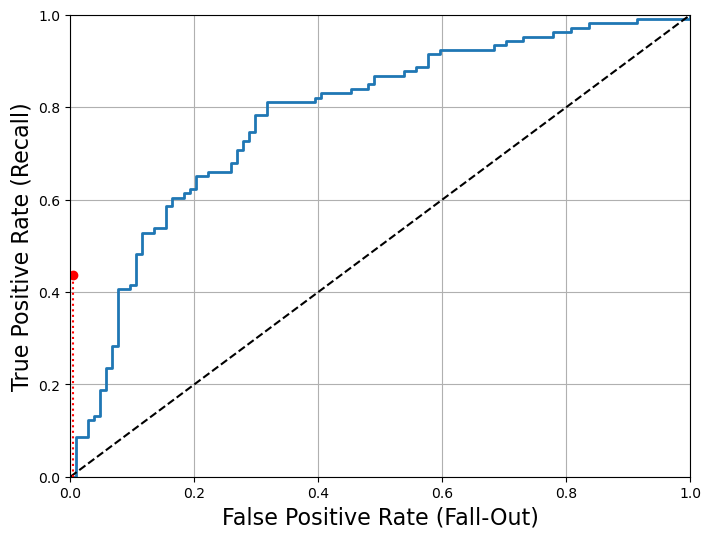

In [82]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [83]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.7812046444121916

#### AUC

In [285]:
from sklearn import metrics
metrics.auc(fpr, tpr)

0.7710651828298887

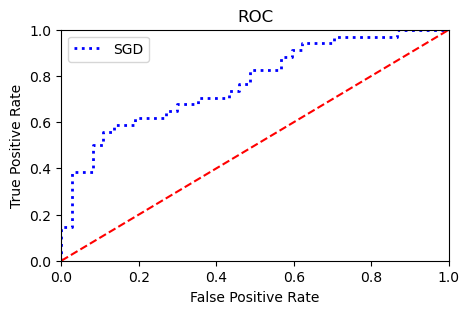

In [85]:
# Plot the ROC-AUC plot
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import matplotlib.pyplot as plt
pred_prob = log_model.predict_log_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,pred_prob)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(5,3))
plt.title("ROC")
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plt.legend(loc=2)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### KNN CLASSIFFIER 

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
knn = KNeighborsClassifier(n_neighbors=3)

In [88]:
pipe1 =make_pipeline(column_trans, knn)

In [89]:
#WE USING PIPELINE TO TRANFORM AND FIT KNN
log_model1 = pipe1.fit(X_train,y_train)
pred1 = pipe1.predict(X_test)

PERFORMNCE MEASURE

In [90]:
print("ACCURACY BASE MODEL :" ,accuracy_score(y_test,pred1))
print("Classification Report :")
print(classification_report(y_test,pred1))

ACCURACY BASE MODEL : 0.6056338028169014
Classification Report :
              precision    recall  f1-score   support

         0.0       0.63      0.59      0.61        37
         1.0       0.58      0.62      0.60        34

    accuracy                           0.61        71
   macro avg       0.61      0.61      0.61        71
weighted avg       0.61      0.61      0.61        71



## Gaussian Naive Bayes

In [91]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [92]:
gnb = GaussianNB()

In [93]:
pipe2 = make_pipeline(column_trans, gnb)

In [94]:
log_model2 = pipe2.fit(X_train, y_train)

In [95]:
y_pred2 = pipe2.predict(X_test)

In [96]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != y_pred2).sum()))

Number of mislabeled points out of a total 71 points : 28


### EVALUATE METRICS

In [97]:
print("ACCURACY BASE MODEL :" ,accuracy_score(y_test,y_pred2))
print("Classification Report :")
print(classification_report(y_test,y_pred2))

ACCURACY BASE MODEL : 0.6056338028169014
Classification Report :
              precision    recall  f1-score   support

         0.0       0.68      0.46      0.55        37
         1.0       0.57      0.76      0.65        34

    accuracy                           0.61        71
   macro avg       0.62      0.61      0.60        71
weighted avg       0.63      0.61      0.60        71



##### CROSS VALIDATION SCORE

In [98]:
cross_val_score(pipe2, X_train, y_train, cv=5, scoring ='accuracy').mean()

0.6333333333333334

##### CONFUSION MATRIX

In [99]:
y_train_pred2 = cross_val_predict(pipe2, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred2)

array([[57, 47],
       [26, 80]])

In [100]:
y_scores2 = cross_val_predict(log_model2, X_train, y_train, cv=3)

In [101]:
fpr2, tpr2, thresholds2 = roc_curve(y_train, y_scores2)

###### ROC CURVE

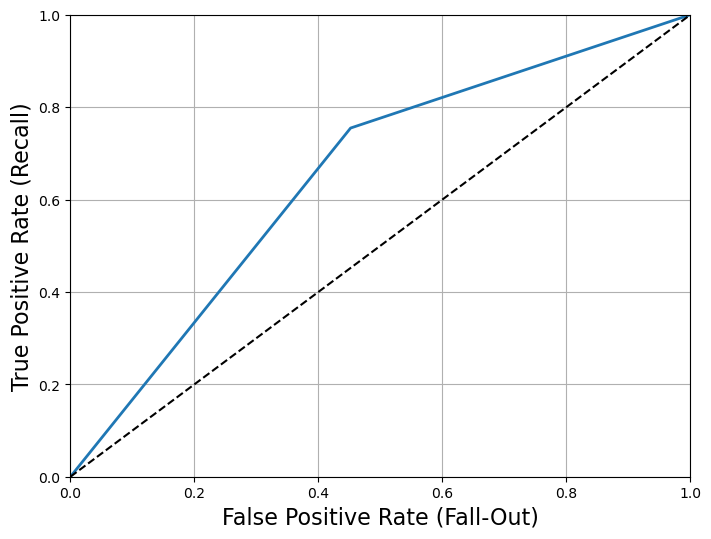

In [102]:
def plot_roc_curve(fpr2, tpr2, label=None):
    plt.plot(fpr2, tpr2, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr2, tpr2)
plt.show()

##### AUC

In [103]:
metrics.auc(fpr2, tpr2)

0.6513969521044993

## Multinomial Naive Bayes

In [104]:
from sklearn.naive_bayes import MultinomialNB

In [105]:
Mnb = MultinomialNB()

In [106]:
MinMax_trans = make_column_transformer(
               (MinMaxScaler(),["ROE"]),
               (MinMaxScaler(),["EPS_Growth"]),
               remainder ='passthrough')

In [107]:
column_tranS = make_column_transformer(
               (OneHotEncoder(),["Region"]),
               (OneHotEncoder(),["Region"]),
               (MinMaxScaler(),["ROE"]),
               (MinMaxScaler(),["EPS_Growth"]),
               remainder ='passthrough')

In [108]:
Xtrain= MinMax_trans.fit_transform(X_train)
Xtest = MinMax_trans.fit_transform(X_test)

In [109]:
pipe3 = make_pipeline(column_tranS, Mnb)

In [110]:
log_model3 =pipe3.fit(X_train,y_train)

In [111]:
ypred3= pipe3.predict(X_test)

#### PERFOMANCE MEASURES

In [112]:
print("ACCURACY BASE MODEL :" ,accuracy_score(y_test,ypred3))
print("Classification Report :")
print(classification_report(y_test,ypred3))

ACCURACY BASE MODEL : 0.6338028169014085
Classification Report :
              precision    recall  f1-score   support

         0.0       0.76      0.43      0.55        37
         1.0       0.58      0.85      0.69        34

    accuracy                           0.63        71
   macro avg       0.67      0.64      0.62        71
weighted avg       0.67      0.63      0.62        71



##### CONFUSSION MATRIX

In [113]:
y_train_pred3 = cross_val_predict(pipe3, X_train, y_train, cv=3)


#### PRECISION AND RECALL

In [114]:
y_train_pred3 = cross_val_predict(log_model3, X_train, y_train, cv=3)

In [115]:
#precision 
precision_score(y_train, y_train_pred3)

0.6142857142857143

In [116]:
#recall
recall_score(y_train, y_train_pred3)

0.8113207547169812

#### ROC CURVES

In [117]:
cross_val_score(pipe3, X_train, y_train, cv=3, scoring ='accuracy')

array([0.7       , 0.55714286, 0.68571429])

## CLUSTERING

In [118]:
from sklearn.cluster import KMeans


first we tranform our X data to numeric using x column tranform defined above. 


In [119]:
X_data = column_trans.fit_transform(X)

## K - Means

In [120]:
from sklearn.cluster import KMeans

In [121]:
k = 2
Kmeans = KMeans(n_clusters=k)


In [122]:
KMeans_pipeline = make_pipeline(column_trans, Kmeans)

In [123]:
#fiting a kmeans algorithm 
Kmeans_y_pred = KMeans_pipeline.fit_predict(X)

In [124]:
Kmeans_y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Each instance was assigned to one of the five clusters. In the context of clustering, an instance’s label is the **index of the cluster** that this instance gets assigned to by the algorithm: this is not to be confused with the **class labels** in classification

In [125]:
Kmeans_y_pred is Kmeans.labels_

True

And the following 2 _centroids_ (i.e., cluster centers) were estimated:

In [126]:
Kmeans.cluster_centers_

array([[8.78787879e-01, 3.03030303e-02, 9.09090909e-02, 8.78787879e-01,
        3.03030303e-02, 9.09090909e-02, 2.09454545e+02, 4.95727273e+02,
        9.76090909e+00, 4.87878788e+00, 1.90727273e+00, 2.01303030e+00,
        1.10515152e+00, 1.18666667e+01, 1.21060606e+01, 1.43869697e+01],
       [2.62096774e-01, 3.75000000e-01, 3.62903226e-01, 2.62096774e-01,
        3.75000000e-01, 3.62903226e-01, 1.32750000e+02, 7.72016129e+01,
        1.37187903e+01, 8.06588710e+00, 2.58245968e+00, 1.77443548e+00,
        1.09887097e+00, 1.04397177e+01, 7.32879032e+00, 3.52000806e+01]])

Note that the `KMeans` instance preserves the labels of the instances it was trained on. Somewhat confusingly, in this context, the _label_ of an instance is the index of the cluster that instance gets assigned to:

In [127]:
Kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

#### ACCURACY

In [128]:
metrics.accuracy_score(y,Kmeans_y_pred)

0.5587188612099644

#### CONFUSION MATRIX

In [129]:
metrics.confusion_matrix(y, Kmeans_y_pred)

array([[ 25, 116],
       [  8, 132]])

## Decision Boundaries

## Hard Clustering vs Soft Clustering
Instead of assigning each instance to a single cluster, which is called hard clustering, it can be useful to give each instance a score per cluster, which is called soft clustering. 

`kmeans.transform` Transforms X to a cluster-distance space.

`kmeans.transform` <- Important to learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.transform">Documentation Link</a>

In [130]:
KMeans_pipeline.transform(X)

array([[494.48394203, 135.52423655],
       [462.98800071, 134.63656105],
       [524.51838201, 149.2332893 ],
       [492.47271577, 133.10801645],
       [526.0931243 , 146.56721791],
       [490.54443527, 131.97432285],
       [527.61499657, 143.7259488 ],
       [245.09053255, 569.67883993],
       [507.32198311, 133.32710475],
       [500.69579976, 131.07643449],
       [523.08365407, 164.01675777],
       [501.5425819 , 131.38273625],
       [497.80063095, 129.8725926 ],
       [383.55952181, 150.50788579],
       [522.94984679, 139.95540639],
       [497.5137494 , 125.02708357],
       [529.9035652 , 142.43546022],
       [451.69942342, 117.46572848],
       [510.40397199, 126.85993068],
       [423.0888193 , 120.9359606 ],
       [479.68736455, 117.21108952],
       [488.93829621, 120.41138725],
       [510.73529697, 126.05890658],
       [188.19154895, 418.63754034],
       [318.26232036, 193.05012374],
       [497.0436919 , 115.46113092],
       [421.96560573, 112.81205963],
 

### K-Means Algorithm

The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:
* First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.

The `KMeans` class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set `init="random"`, `n_init=1`and `algorithm="full"`. These hyperparameters will be explained below.

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [131]:

kmeans_iter1 = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
iter1_pipe = make_pipeline(column_tranS, kmeans_iter1)
iter2_pipe = make_pipeline(column_tranS, kmeans_iter2)
iter3_pipe = make_pipeline(column_tranS, kmeans_iter3)

iter1_pipe.fit(X)
iter2_pipe.fit(X)
iter3_pipe.fit(X)


/opt/anaconda3/envs/F21DL/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/envs/F21DL/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/envs/F21DL/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(), ['Region']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(), ['Region']),
                                                 ('minmaxscaler-1',
                                                  MinMaxScaler(), ['ROE']),
                                                 ('minmaxscaler-2',
                                                  MinMaxScaler(),
                                                  ['EPS_Growth'])])),
                ('kmeans',
                 KMeans(algorithm='full', init='random', max_iter=3,
                        n_clusters=2, n_init=1, random_state=1))])

### Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the _inertia_ metric:

In [132]:
Kmeans.inertia_

3972590.6416889783

As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid:

When you set the `n_init` hyperparameter, Scikit-Learn runs the original algorithm `n_init` times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets `n_init=10`.

### Finding the optimal number of clusters

No, we cannot simply take the value of  𝑘  that minimizes the inertia, since it keeps getting lower as we increase  𝑘 . Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of  𝑘  and analyze the resulting curve:

In [133]:
kmeans_per_k = [KMeans(n_clusters=k).fit(column_tranS.fit_transform(X))
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

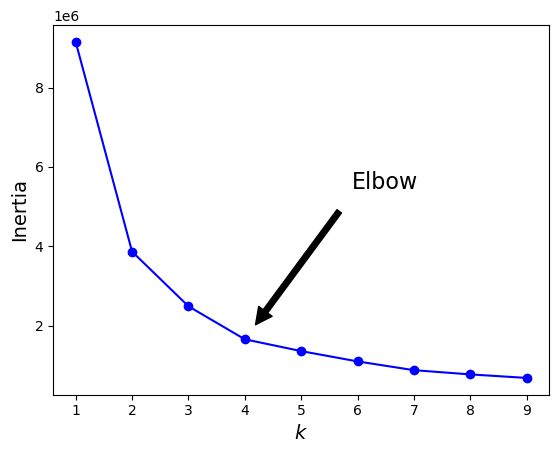

In [134]:
#plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
#plt.axis([1, 8.5, 0, 1300])
plt.show()

As you can see, there is an elbow at $k=4$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=4$ is a pretty good choice. Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

### Limits of K-Means 
-  It is necessary to run the algorithm several times to avoid suboptimal solutions
-  The number of clusters should be specified
- K-Means does not behave very well when the clusters have varying sizes, different densities, or nonspherical shapes

4-clusters

In [135]:
optimal_clustering = KMeans(n_clusters=4).fit(column_tranS.fit_transform(X))

performance measure

In [136]:
#inertia
optimal_clustering.inertia_

1654371.008481116

### PERFORMENACE MEASURES

In [137]:
target_names = ['Low','High']
print(classification_report(y, Kmeans.labels_, target_names = target_names))

              precision    recall  f1-score   support

         Low       0.76      0.18      0.29       141
        High       0.53      0.94      0.68       140

    accuracy                           0.56       281
   macro avg       0.64      0.56      0.48       281
weighted avg       0.65      0.56      0.48       281



### Visualising clusters

In [138]:
from sklearn.decomposition import PCA

In [139]:
pca = PCA(2)

In [140]:
df = pca.fit_transform(column_tranS.fit_transform(X))

In [141]:
#predict the labels
label = Kmeans.fit_predict(df)

In [142]:
#getting unique labels
u_labels =np.unique(label)
u_labels

array([0, 1], dtype=int32)

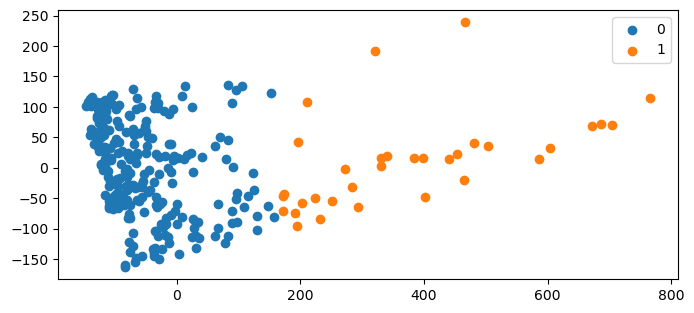

In [143]:
#plotting the results of binary classification
plt.figure(figsize=(8, 3.5))
for i in u_labels:
    plt.scatter(df[label == i,0], df[label == i, 1], label = i)
plt.legend()
plt.show()

    

#### ACCURACY

In [218]:
metrics.accuracy_score(y,y_cluster_gmm)

0.39501779359430605

#### CONFUSION MATRIX

In [219]:
metrics.confusion_matrix(y, y_cluster_gmm)

array([[ 94,  47],
       [123,  17]])

In [146]:
#plotting the results of clusters =4
u_labels1 = np.unique(optimal_clustering.labels_)


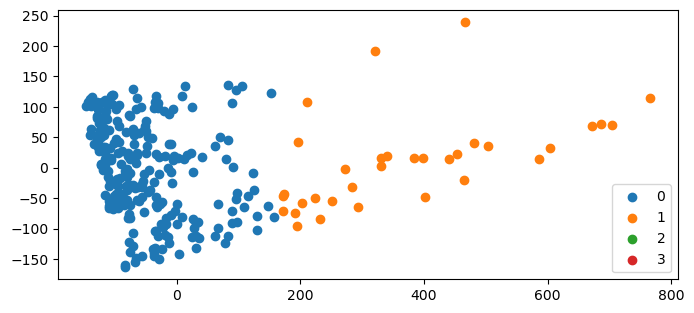

In [147]:
plt.figure(figsize=(8, 3.5))
for i in u_labels1:
    plt.scatter(df[label == i,0], df[label == i, 1], label = i)
plt.legend()
plt.show()

### EM - GMM (BEYONG K-MEANS)

In [148]:
from sklearn.mixture import GaussianMixture 

In [149]:
gmm = GaussianMixture(n_components = 2, random_state = 0).fit(df)

In [150]:
y_cluster_gmm = gmm.predict(df)

#### ACCURACY

In [151]:
metrics.accuracy_score(y,y_cluster_gmm)

0.39501779359430605

#### CONFUSION MATRIX

In [152]:
metrics.confusion_matrix(y, y_cluster_gmm)

array([[ 94,  47],
       [123,  17]])

In [153]:
94+17

111

### VIRSUALISATION

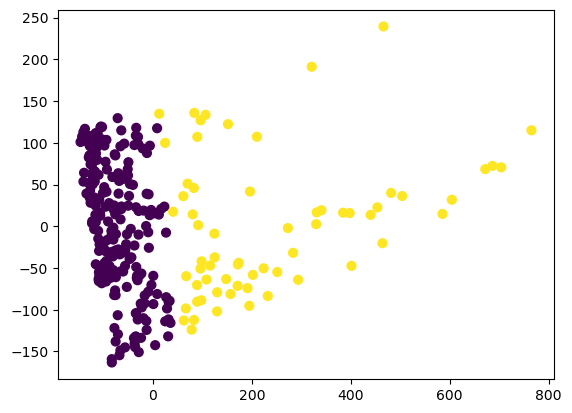

In [154]:

plt.scatter(df[:, 0], df[:, 1], c = y_cluster_gmm, s=40, cmap='viridis');

## DECISION TREES

In [155]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [156]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=0)
tree_clf.fit(df, y)

DecisionTreeClassifier(max_depth=2, random_state=0)

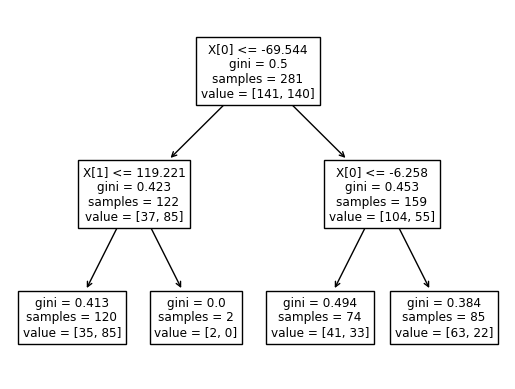

In [157]:
#Plot the tree
plot_tree(tree_clf);

# Predicting classes and class probabilities

In [158]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.74117647, 0.25882353]])

In [159]:
tree_clf.predict([[5, 1.5]])

array([0.])

# Regularization Hyperparameters

To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom during training. As you know by now, this is called regularization. 

## TREE 1

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
tree = DecisionTreeClassifier(criterion = "gini",
            random_state = 0,max_depth=3, min_samples_leaf=10)
tree_1 = tree.fit(column_tranS.fit_transform(X_train), y_train)

In [161]:
tree1_pred = tree_1.predict(column_tranS.fit_transform(X_test))
print("Predicted values:")
print(tree1_pred)

Predicted values:
[1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.]


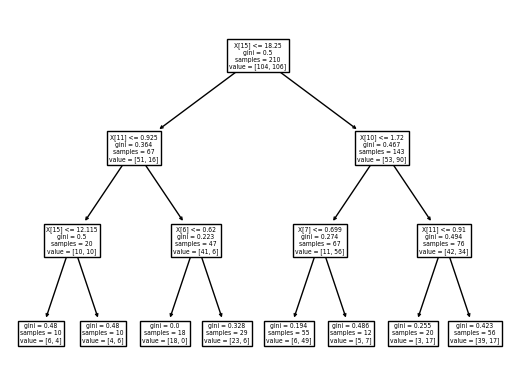

In [162]:
#Plot the tree
plot_tree(tree_1);

## PERFORMANCE MEASURES

#### CONFUSION MATRIX

In [163]:
confusion_matrix(y_test, tree1_pred)

array([[28,  9],
       [17, 17]])

#### ACCURACY

In [164]:
accuracy_score(y_test,tree1_pred)*100

63.38028169014085

#### CLASSIFICATION REPORT

In [165]:
print("Report : ",
classification_report(y_test, tree1_pred))

Report :                precision    recall  f1-score   support

         0.0       0.62      0.76      0.68        37
         1.0       0.65      0.50      0.57        34

    accuracy                           0.63        71
   macro avg       0.64      0.63      0.62        71
weighted avg       0.64      0.63      0.63        71



## TREE 2

In [166]:
#Make new training and testing sets, by moving 30% of the instances from the original training set into the testing set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.475, random_state=1) 
##52.5% of the data for training and 47.5% for testing.

In [167]:
tree_2 = tree.fit(column_tranS.fit_transform(X_train2), y_train2)

In [168]:
tree2_pred = tree_2.predict(column_tranS.fit_transform(X_test2))
print("Predicted values:")
print(tree1_pred)

Predicted values:
[1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.]


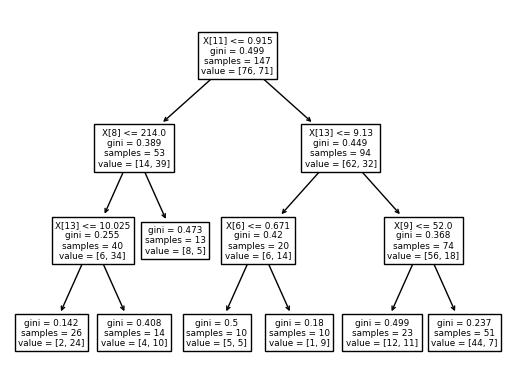

In [169]:
#Plot the tree
plot_tree(tree_2);

## PERFORMANCE MEASURES

#### CONFUSION MATRIX

In [170]:
confusion_matrix(y_test2, tree2_pred)

array([[57,  8],
       [44, 25]])

#### ACCURACY

In [171]:
accuracy_score(y_test2,tree2_pred)*100

61.19402985074627

#### CLASSIFICATION REPORT

In [172]:
print("Report : ",
classification_report(y_test2, tree2_pred))

Report :                precision    recall  f1-score   support

         0.0       0.56      0.88      0.69        65
         1.0       0.76      0.36      0.49        69

    accuracy                           0.61       134
   macro avg       0.66      0.62      0.59       134
weighted avg       0.66      0.61      0.59       134



## TREE 3

In [173]:
#Make new training and testing sets, by moving 60% of the instances from the original training set into the testing set
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.70, random_state=1) 
##30% of the data for training and 70% for testing.

In [174]:
tree_3 = tree.fit(column_tranS.fit_transform(X_train3), y_train3)

In [175]:
tree3_pred = tree_3.predict(column_tranS.fit_transform(X_test3))
print("Predicted values:")
print(tree1_pred)

Predicted values:
[1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.]


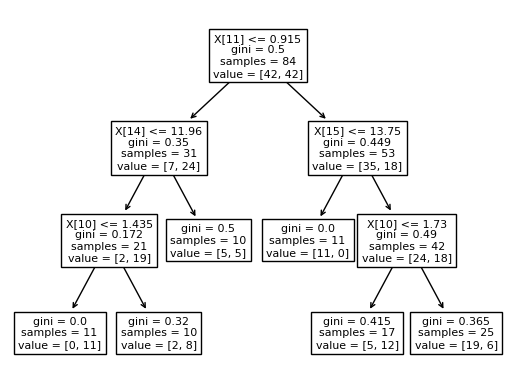

In [176]:
#Plot the tree
plot_tree(tree_3);

## PERFORMANCE MEASURES

#### CONFUSION MATRIX

In [177]:
confusion_matrix(y_test3, tree3_pred)

array([[78, 21],
       [39, 59]])

#### ACCURACY

In [178]:
accuracy_score(y_test3,tree3_pred)*100

69.54314720812182

#### CLASSIFICATION REPORT

In [179]:
print("Report : ",
classification_report(y_test3, tree3_pred))

Report :                precision    recall  f1-score   support

         0.0       0.67      0.79      0.72        99
         1.0       0.74      0.60      0.66        98

    accuracy                           0.70       197
   macro avg       0.70      0.69      0.69       197
weighted avg       0.70      0.70      0.69       197



# Linear Regression

In [180]:
from sklearn.linear_model import LinearRegression

In [181]:
lin_reg = LinearRegression()
lin_reg.fit(column_tranS.fit_transform(X_train), y_train)
lin_reg.intercept_, lin_reg.coef_

(0.719443020714637,
 array([ 9.50440237e-02,  5.58065384e-02, -1.50850562e-01,  9.50440237e-02,
         5.58065384e-02, -1.50850562e-01, -3.89290828e+00,  4.14375416e+00,
        -8.12769890e-04, -2.41076136e-04, -1.03205112e-02, -5.42776786e-02,
         3.70283232e-01, -7.65295267e-02, -1.31274030e-02,  6.01862017e-03]))

In [182]:
lin_y_pred = lin_reg.predict(column_tranS.fit_transform(X_test))

In [183]:
lin_y_pred

array([ 0.47810503, -0.07842172, -0.17123184,  0.47286732, -0.07761785,
       -0.04842921,  0.27711817,  0.51992879,  0.55288553,  0.33699433,
        0.59872528,  0.36156711,  0.69387667,  0.48148569,  0.43812406,
        0.28760001,  0.01956961,  0.62918555,  0.49553562,  0.12089404,
        0.62706402, -0.07973397,  0.58340942,  0.50441036,  0.43946349,
       -0.17758995, -0.19302294,  0.36100298,  0.03405252, -0.13020445,
        0.25934695, -0.01039237,  0.14045383, -0.20163087,  0.08301171,
        0.38952846,  0.34968444,  0.34591989,  0.37361899, -0.1006184 ,
       -0.22864098,  0.03554183,  0.20610961, -0.00762602,  0.40644443,
        0.36119184,  0.5914164 ,  0.36542683,  0.23623123,  0.07639098,
        0.21461086,  0.18950936, -0.01957308,  0.43422645,  0.19529664,
       -0.09467759,  0.18491168,  0.52128769,  0.57560053,  0.21332549,
        0.04247209,  0.47582098,  0.1871346 ,  0.57115135,  0.47660636,
        0.46933948,  0.00619361,  0.03395616,  0.67789284,  0.10

The LinearRegression class is based on the `scipy.linalg.lstsq()` function (the name stands for “least squares”), which you could call directly:

In [184]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(column_tranS.fit_transform(X_train), y_train, rcond=1e-6)
theta_best_svd

array([ 4.54765534e-01,  4.15528049e-01,  2.08870948e-01,  4.54765534e-01,
        4.15528049e-01,  2.08870948e-01, -3.89290828e+00,  4.14375416e+00,
       -8.12769890e-04, -2.41076136e-04, -1.03205112e-02, -5.42776786e-02,
        3.70283232e-01, -7.65295267e-02, -1.31274030e-02,  6.01862017e-03])

## PERFORMANCE MEASURES

MEAN SQUARE ERROR

In [185]:
 from sklearn.metrics import mean_squared_error

In [186]:
mean_squared_error(y_test, lin_y_pred)

0.2641669510659059

## LOGISTIC REGRESSION

In [187]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_model = log_reg.fit(column_tranS.fit_transform(X_train), y_train)

In [188]:
log_y_pred = log_model.predict(column_tranS.fit_transform(X_test))

In [189]:
log_model.coef_

array([[-9.76426484e-02,  3.35899817e-01, -1.38305001e-01,
        -9.76426484e-02,  3.35899817e-01, -1.38305001e-01,
         7.86372402e-02,  1.01220761e-01,  4.06910129e-03,
        -3.09947014e-04, -1.35754383e-01, -2.44010009e-01,
        -2.81839549e-02, -8.17804511e-02, -5.88051259e-02,
         4.03803683e-02]])

## PERFORMANCE MEASURES

#### ACCURACY

In [190]:
accuracy_score(y_test,log_y_pred)*100

67.6056338028169

#### PRECISION

In [191]:
unexpected EOF while parsing

64.1025641025641

#### CLASSIFICATION

In [192]:
print("Report : ",
classification_report(y_test, log_y_pred))

Report :                precision    recall  f1-score   support

         0.0       0.72      0.62      0.67        37
         1.0       0.64      0.74      0.68        34

    accuracy                           0.68        71
   macro avg       0.68      0.68      0.68        71
weighted avg       0.68      0.68      0.68        71



## EXPERIMENTING WITH DIFFERENT PARAMETERS OF REGRESSION

##### LEARNING RATE, THE NUMBER OF ITTERATIONS , BATCH SIZE

Linear model fitted by minimizing a regularized empirical loss with SGD.

SGD stands for Stochastic Gradient Descent.

The SGDRe gressor class defaults to optimizing the squared error cost function

In [193]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter_no_change = 7, max_iter =100000, penalty=None, eta0=0.001, shuffle = False)

sgd_model = sgd_reg.fit(column_tranS.fit_transform(X_train), y_train)

In [194]:
sgd_y_pred = sgd_model.predict(column_tranS.fit_transform(X_test))

In [195]:
mean_squared_error(sgd_y_pred , y_test)

6.687634361023505e+25

In [196]:
sgd_reg.coef_

array([ 2.59318607e+09, -2.61747233e+09,  3.18267514e+08,  2.59318607e+09,
       -2.61747233e+09,  3.18267514e+08,  7.73698872e+08,  4.94376571e+08,
        3.07167356e+09, -4.30236595e+10,  2.39740345e+09, -7.02390080e+09,
       -1.93113927e+09, -8.79442118e+09, -8.08583835e+09,  8.21464262e+09])

In [197]:
sgd_reg.intercept_

array([2.93981255e+08])

# NEURO NETWORKS

## PERCEPTRONS

In [241]:
from sklearn.linear_model import Perceptron

In [314]:
per_clf = Perceptron(max_iter=10000, tol=0.0001, random_state=0)
per_clf.fit(df_train, y_train)

Perceptron(max_iter=10000, tol=0.0001)

In [315]:
p_y_pred = per_clf.predict(df_test)

### ACCURACY

In [316]:
accuracy_score(y_test,p_y_pred)*100

46.478873239436616

### MATRIX

In [317]:
cm = confusion_matrix(y_test, p_y_pred)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
cm

array([[17, 20],
       [18, 16]])

In [318]:
print("Report : ",
classification_report(y_test, p_y_pred))

Report :                precision    recall  f1-score   support

         0.0       0.49      0.46      0.47        37
         1.0       0.44      0.47      0.46        34

    accuracy                           0.46        71
   macro avg       0.47      0.47      0.46        71
weighted avg       0.47      0.46      0.47        71



#### PRECISION

In [319]:
precision_score(y_test, p_y_pred)

0.4444444444444444

In [320]:
#TRUE POSITIVE
TP

17

In [321]:
#TRUE NEGATIVR
TN

16

In [322]:
#FALSE POSITIVE
FP

20

In [323]:
#FALSE NEGATIVE
FN

18

In [324]:
#SENSITIVITY
S = TP/(TP+FP)
S

0.4594594594594595

In [325]:
#specificity
sp = TN/(TN+FN)
sp

0.47058823529411764

In [326]:
#auc
pfpr =
metrics.auc(pfpr, ptpr)

0.7812046444121916

### Activation functions

Just to give you an idea what diffirent activation functions for NN look like. In class we will dicuss variation of avctivation fuctions in NN1 and NN2. The derivitaive of the activation function is also important. Can you think of a reason? Here you will not use the activation functions or their derivatives. Only if you want to buils a NN & its learning from scratch ( see github code -& book chapter 10)

In [245]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

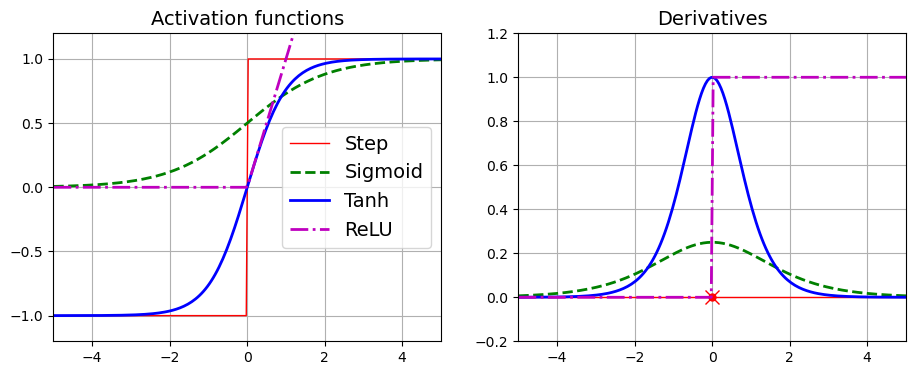

In [246]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

### Building an Image Classifier

#We use the smiley dataset provided on cabcas for tasks in labs for week 10 and wekk 11

In [247]:
import tensorflow as tf 

In [248]:
import numpy as np
import sys
from tensorflow import keras
from tensorflow.keras import layers
import sklearn.model_selection
import matplotlib.pyplot as plt

In [249]:
print(tf.__version__)

2.9.1


Let’s build the neural network! Here is a classification MLP with two hidden layers:

In [235]:
X_new = np.load("smiley_X.npy")

In [236]:
y_new = np.load("smiley_y.npy")

In [254]:
model = keras.models.Sequential()
#model.add(keras.layers.Flatten(input_shape=[28, 28])) # first layer convert each input image into a 1D array
model.add(keras.layers.Dense(300, activation="relu")) #hidden layer with 300 neurons useing the ReLU activation function.
model.add(keras.layers.Dense(100, activation="relu")) #hidden layer with 100 neurons using the ReLU

model.add(keras.layers.Dense(10, activation="softmax")) #output layer with 10

In [255]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

After a model is created, you must call its compile() method to specify the loss function and the optimizer (i.e learning rule) to use.

In [256]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", #"sgd" simply means that we will train the model using simple Stochastic Gradient Descent
              metrics=["accuracy"])

We use the "sparse_categorical_crossen tropy" loss because we have sparse labels (i.e., for each instance there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classi‐ fication (with one or more binary labels), then we would use the "sigmoid" (i.e., logistic) activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.
Below we train the model; so we call the fit() method. We pass it the input features (X_train) and the target classes (y_train), as well as the number of epochs to train

In [267]:
model.evaluate(df_test, y_test)
y_p_pred = model.predict(df_test)

3/3 [==============================] - 0s 1ms/step


## BUILDING ANN MODEL

In [214]:
model = tf.keras.Sequential([
    #tf.keras.layers.Flatten(input_shape=(16, 16)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [215]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model

In [223]:
df_train = pca.fit_transform(column_tranS.fit_transform(X_train))
df_test = pca.fit_transform(column_tranS.fit_transform(X_test))


In [226]:
model.fit(x= df_train, y=y_train,epochs=10)

Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.7286
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.7190
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.6286
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 0.8607 - accuracy: 0.7095
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.6476
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.7094 - accuracy: 0.6571
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.6762
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.6857
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 0.7121 - accuracy: 0.6429
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: 0.5926 - accuracy: 0.7000


## Evaluate

In [227]:
test_loss, test_acc = model.evaluate(df_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.6478873491287231


## PREDICTION

In [228]:
y_ann_pred = model.predict(df_test)

3/3 [==============================] - 0s 4ms/step
